<a href="https://colab.research.google.com/github/NiloferMubeen/Recommendation_Systems/blob/main/Basic_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation based on Average weighted Balance

> * Dataset - [link ](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("tmdb/tmdb-movie-metadata")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/tmdb/tmdb-movie-metadata/versions/2


In [2]:
import os
import pandas as pd
import numpy as np
print(os.listdir(path))

['tmdb_5000_movies.csv', 'tmdb_5000_credits.csv']


In [3]:
file_path = os.path.join(path, "tmdb_5000_movies.csv")  # Adjust filename if different
movies_df = pd.read_csv(file_path)

In [4]:
movies_df.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
file_path = os.path.join(path, 'tmdb_5000_credits.csv')  # Adjust filename if different
credits_df = pd.read_csv(file_path)
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
print("Movies:",movies_df.shape)
print("Credits:",credits_df.shape)

Movies: (4803, 20)
Credits: (4803, 4)


In [7]:
print("Movies: \n",movies_df.columns)
print("Credits: \n",credits_df.columns)

Movies: 
 Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')
Credits: 
 Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')


In [8]:
movies_df['id'].head()

,id
0,19995
1,285
2,206647
3,49026
4,49529


In [9]:
credits_df['movie_id'].head()

,movie_id
0,19995
1,285
2,206647
3,49026
4,49529


In [10]:
credits_df.rename(columns= {'movie_id':'id'},inplace=True)  #renaming column name

In [11]:
final_df = movies_df.merge(credits_df,on = 'id')

In [12]:
final_df.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


In [13]:
final_df.drop(['homepage','title_x','title_y','status','production_countries'],inplace=True,axis =1)

In [14]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

# Calculating weighted Rating using vote_average and vote_count

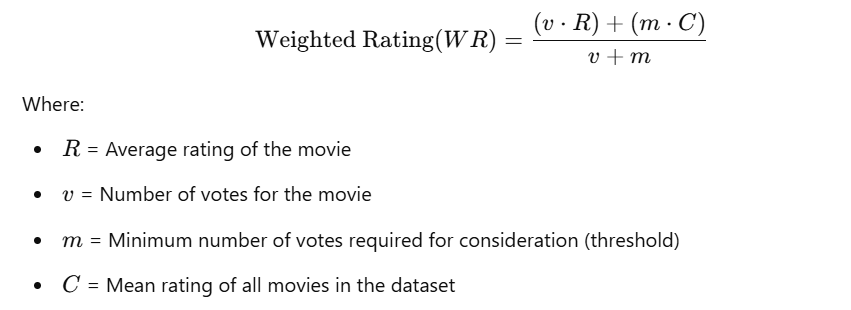

In [15]:
C = final_df['vote_average'].mean()
m = final_df['vote_count'].quantile(0.70)

# Compute weighted rating
def weighted_rating(row, C, m):
    v = row['vote_count']
    R = row['vote_average']
    return ((v * R) + (m * C)) / (v + m) if v >= m else R

final_df['weighted_rating'] = final_df.apply(lambda row: weighted_rating(row, C, m), axis=1)


In [16]:
final_df = final_df.sort_values(by='weighted_rating', ascending=False)
final_df[['original_title','vote_count','vote_average','weighted_rating','popularity']].head(20)

,original_title,vote_count,vote_average,weighted_rating,popularity
4247,Me You and Five Bucks,2,10.0,10.000000,0.094105
3519,Stiff Upper Lips,1,10.0,10.000000,0.356495
4045,"Dancer, Texas Pop. 81",1,10.0,10.000000,0.376662
4662,Little Big Top,1,10.0,10.000000,0.092100
3992,Sardaarji,2,9.5,9.500000,0.296981
2386,One Man's Hero,2,9.3,9.300000,0.910529
2970,There Goes My Baby,2,8.5,8.500000,0.037073
2796,The Prisoner of Zenda,11,8.4,8.400000,4.021389
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729
4755,Counting,3,8.3,8.300000,0.293587


<Axes: title={'center': 'Weighted Average vs Title'}, xlabel='weighted_rating', ylabel='original_title'>

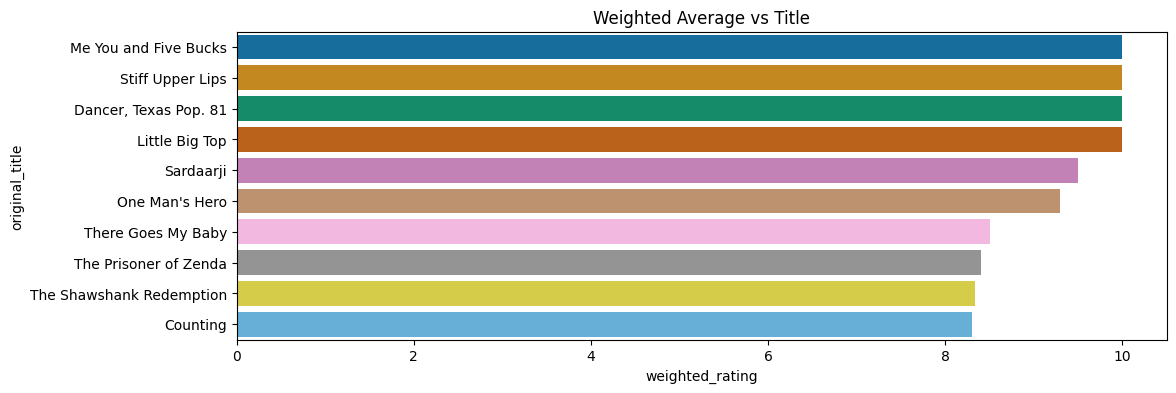

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,4))
plt.title("Weighted Average vs Title")
sns.barplot(y=final_df['original_title'].head(10),x=final_df['weighted_rating'].head(10),palette='colorblind',hue=final_df['original_title'].head(10),legend=False)


Based on weighted average, 'Me You and Five bucks' has the highest rating.

<Axes: title={'center': 'Popularity vs Title'}, xlabel='popularity', ylabel='original_title'>

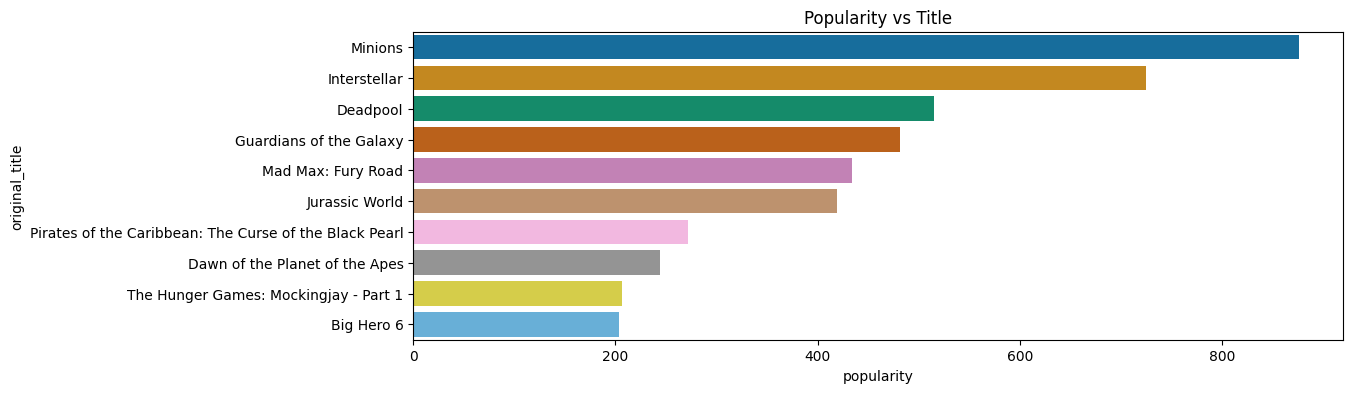

In [18]:
plt.figure(figsize=(12,4))
plt.title("Popularity vs Title")
popular = final_df.sort_values(by='popularity',ascending=False)
sns.barplot(y=popular['original_title'].head(10),x=popular['popularity'].head(10),palette='colorblind',hue=popular['original_title'].head(10),legend=False)

But based on popularity Minions is the most popular movie. So both these features are important for building a recommendation system

# Recommendation based on scaled weighted rating and popularity score

* 50% importance given to both

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_df = scaler.fit_transform(final_df[['weighted_rating','popularity']])

normalized_df = pd.DataFrame(scaled_df,columns = ['weighted_rating','popularity'])

In [20]:
normalized_df.head()

,weighted_rating,popularity
0,1.00,0.000107
1,1.00,0.000407
2,1.00,0.000430
3,1.00,0.000105
4,0.95,0.000339


In [21]:
final_df[['norm_weighted_rating','norm_popularity']] = normalized_df

In [22]:
final_df.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_rating,norm_weighted_rating,norm_popularity
4247,1,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 35, ...",361505,[],en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",0.094105,[],2015-07-07,...,90.0,[],"A story about second, second chances",10.0,2,[],[],10.0,0.5,0.026603


# giving 50% importance to both columns

In [26]:
final_df['score'] = (final_df['norm_weighted_rating']* 0.50) + (final_df['norm_popularity']*0.50)
final_df = final_df.sort_values(by = 'score',ascending=False)
final_df[['original_title','norm_weighted_rating','norm_popularity','score']].head(10)

,original_title,norm_weighted_rating,norm_popularity,score
2058,Stone,0.636529,1.000000,0.818264
41,Green Lantern,0.799810,0.827162,0.813486
74,Edge of Tomorrow,0.779825,0.549462,0.664644
307,The Expendables 3,0.733436,0.587690,0.660563
495,Journey 2: The Mysterious Island,0.713569,0.495989,0.604779
1803,Blood and Wine,0.647436,0.478206,0.562821
289,The Emperor's New Groove,0.739189,0.310620,0.524904
15,The Chronicles of Narnia: Prince Caspian,0.810267,0.213941,0.512104
21,Robin Hood,0.803470,0.219887,0.511678
2,Spectre,1.000000,0.000430,0.500215
